In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

def format_plt():
    """
    Formats matplotlib to appear use Latex + Seaborn theme.
    """
    global plt
    plt.rcParams.update(
        {
            "text.usetex": True,
            "font.family": "serif",
            "font.serif": ["Computer Modern Roman"],  # or another LaTeX font
            "axes.grid": False,
            "text.color": "black",
        }
    )
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.style.use("seaborn-v0_8-bright")


In [8]:
from stonesoup.types.groundtruth import GroundTruthPath, GroundTruthState
from stonesoup.models.transition.driver import GammaNVMDriver
from stonesoup.models.transition.driven import Langevin
from datetime import datetime, timedelta

from stonesoup.models.transition.base import CombinedLinearDrivenTransitionModel

# And the clock starts
start_time = datetime.now().replace(microsecond=0)
seed = 1001

mu_W = 19
sigma_W2 = 75
gamma = np.sqrt(2.)
beta = (gamma ** 2) / 2.
nu = 0.05
theta=-0.25

gamma_driver1 = GammaNVMDriver(mu_W=mu_W, sigma_W2=sigma_W2, seed=seed, c=20, nu=nu, beta=beta)
gamma_driver2 = gamma_driver1
langevin_x = Langevin(cg_driver=gamma_driver1, theta=theta)
langevin_y = Langevin(cg_driver=gamma_driver2, theta=theta)
transition_model = CombinedLinearDrivenTransitionModel([langevin_x, langevin_y])


timesteps = [start_time]
truth = GroundTruthPath([GroundTruthState([0, 1, 0, 1], timestamp=timesteps[0])])

num_steps = 100
for k in range(1, num_steps + 1):
    timesteps.append(start_time+timedelta(seconds=k))  # add next timestep to list of timesteps
    truth.append(GroundTruthState(
        transition_model.function(truth[k-1], noise=True, time_interval=timedelta(seconds=1)),
        timestamp=timesteps[k]))

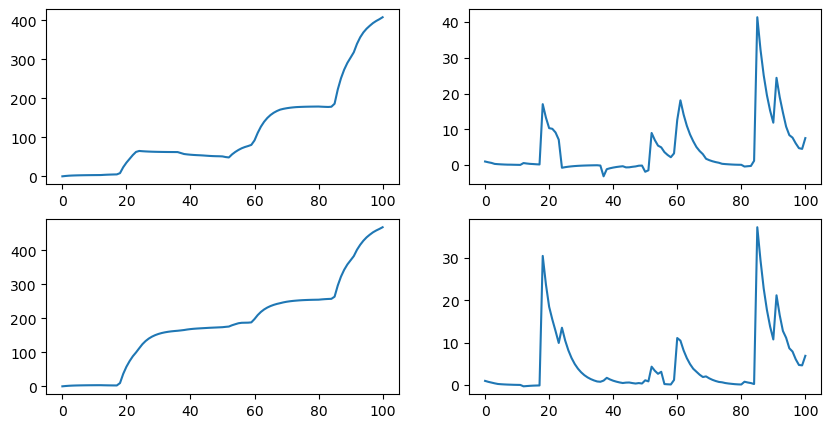

In [9]:
t = np.array([(data.timestamp - start_time).total_seconds() for data in truth])
t -= t[0]

y0 = np.array([data.state_vector[0] for data in truth])
y1 = np.array([data.state_vector[1] for data in truth])
y2 = np.array([data.state_vector[2] for data in truth])
y3 = np.array([data.state_vector[3] for data in truth])

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0][0].plot(t, y0)
axs[0][1].plot(t, y1)
axs[1][0].plot(t, y2)
axs[1][1].plot(t, y3)
